# Data exploration

In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function
print('print function is ready to serve')

# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_column', 100)


# Matplotlib for visualization
from matplotlib import pyplot as plt

# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

import os

print function is ready to serve


In [2]:
PLANET_KAGGLE_ROOT = '/Users/jiayou/Documents/Kaggle Data/Amazon'

train_labels = pd.read_csv(os.path.join(PLANET_KAGGLE_ROOT, 'train_v2.csv'))
train_labels.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [3]:
import sys
import os
import subprocess

from six import string_types

# import ds packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
from IPython.display import display
%matplotlib inline

# Build list with unique labels
label_list = []
for tag_str in train_labels.tags.values:
    labels = tag_str.split(' ')
    for label in labels:
        if label not in label_list:
            label_list.append(label)
            
# Add onehot features for every label
labels_df = train_labels
for label in label_list:
    labels_df[label] = labels_df['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)

def sample_images(tags, n=None):
    """Randomly sample n images_df with the specified tags."""
    condition = True
    if isinstance(tags, string_types):
        raise ValueError("Pass a list of tags, not a single tag.")
    for tag in tags:
        condition = condition & labels_df[tag] == 1
    if n is not None:
        return labels_df[condition].sample(n)
    else:
        return labels_df[condition]
    
def sample_to_fname(sample_df, row_idx, suffix='jpg'):
    '''Given a dataframe of sampled images, get the
    corresponding filename.'''
    fname = sample_df.get_value(sample_df.index[row_idx], 'image_name')
    return '{}.{}'.format(fname, suffix)

def load_image(filename):
    '''Look through the directory tree to find the image you specified
    (e.g. train_10.tif vs. train_10.jpg)'''
    for dirname in os.listdir(PLANET_KAGGLE_ROOT):
        path = os.path.abspath(os.path.join(PLANET_KAGGLE_ROOT, dirname, filename))
        if os.path.exists(path):
            print('Found image {}'.format(path))
            return io.imread(path)
    # if you reach this line, you didn't find the image you're looking for
    print('Load failed: could not find image {}'.format(path))

In [4]:
label_list
labels_df.head()

,image_name,tags,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
0,train_0,haze primary,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,train_1,agriculture clear primary water,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,train_2,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,train_3,clear primary,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,train_4,agriculture clear habitation primary road,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0


In [5]:
sample_df = sample_images(['water'], 5)
filename = sample_to_fname(sample_df, 1)
load_image(filename).dtype

Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_2890.jpg


dtype('uint8')

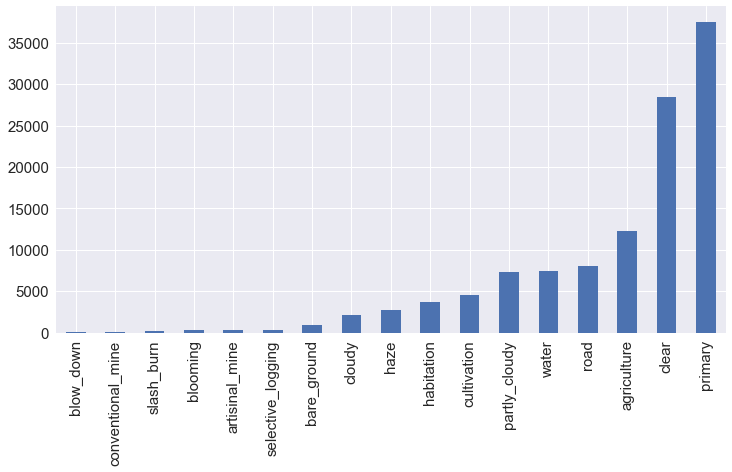

In [6]:
# Histogram of label instances
plt.figure(figsize = (12, 6))

labels_df[label_list].sum().sort_values().plot.bar(fontsize = 15)

In [7]:
s = sample_images(['partly_cloudy'], 5)
s.index

Int64Index([27627, 12147, 19767, 2563, 2039], dtype='int64')

Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_26171.jpg
Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_456.jpg
Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_25711.jpg
Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_33248.jpg
Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_6365.jpg


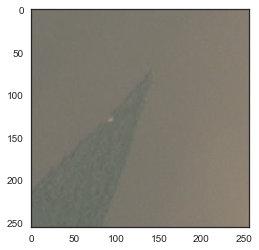

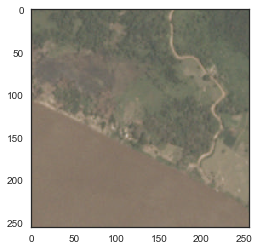

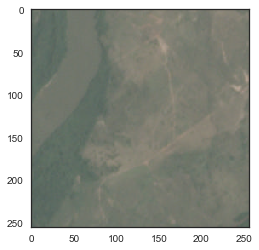

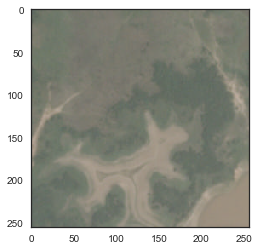

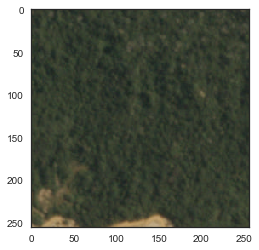

In [57]:
n_samples = 5
samples = sample_images(['water'], n_samples)
for i in range(n_samples):
    plt.figure()
    plt.imshow(load_image(sample_to_fname(samples, i)))

,haze,primary,agriculture,clear,water,habitation,road,cultivation,slash_burn,cloudy,partly_cloudy,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
haze,2697,2670,672,0,613,129,394,202,3,0,0,2,41,5,4,5,0
primary,2670,37513,11972,27668,7001,3469,7728,4455,209,0,7175,94,683,324,332,340,98
agriculture,672,11972,12315,9150,2712,2737,6034,3377,119,0,2493,24,225,38,32,65,22
clear,0,27668,9150,28431,5502,3090,6295,3527,173,0,0,70,747,307,311,308,85
water,613,7001,2712,5502,7411,915,2125,868,24,0,1295,26,206,299,16,49,3
habitation,129,3469,2737,3090,915,3660,2786,895,41,0,441,36,163,29,4,13,3
road,394,7728,6034,6295,2125,2786,8071,1294,36,0,1382,59,323,110,10,151,2
cultivation,202,4455,3377,3527,868,895,1294,4477,126,0,748,4,89,18,35,58,8
slash_burn,3,209,119,173,24,41,36,126,209,0,33,0,10,0,2,2,2
cloudy,0,0,0,0,0,0,0,0,0,2089,0,0,0,0,0,0,0


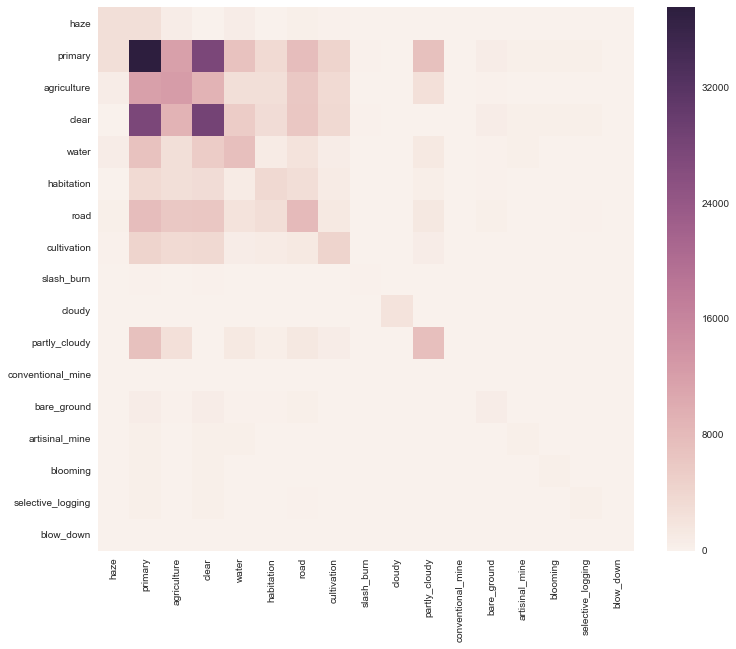

In [16]:
def make_cooccurence_matrix(labels):
    numeric_df = labels_df[labels]
    c_matrix = numeric_df.T.dot(numeric_df)
    sns.heatmap(c_matrix)
    return c_matrix
    
# Compute the co-ocurrence matrix
sns.set_style('white')
plt.figure(figsize = (12, 10))
make_cooccurence_matrix(label_list)

,slash_burn,conventional_mine,bare_ground,artisinal_mine,blooming,selective_logging,blow_down
slash_burn,209,0,10,0,2,2,2
conventional_mine,0,100,10,4,0,0,0
bare_ground,10,10,862,40,3,13,4
artisinal_mine,0,4,40,339,0,6,0
blooming,2,0,3,0,332,7,1
selective_logging,2,0,13,6,7,340,1
blow_down,2,0,4,0,1,1,98


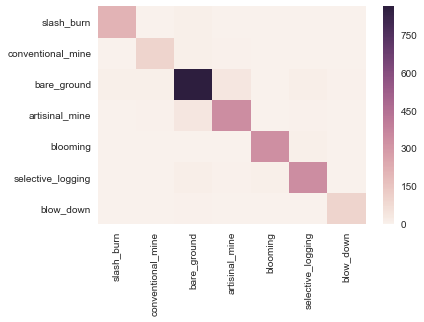

In [19]:
weather_labels = ['clear', 'partly_cloudy', 'haze', 'cloudy']
land_labels = ['primary', 'agriculture', 'water', 'cultivation', 'habitation']
rare_labels = [l for l in label_list if labels_df[label_list].sum()[l] < 2000]
make_cooccurence_matrix(rare_labels)

# Weather
## Image exploring

In [48]:
load_image(sample_to_fname(sample_images(['primary', 'clear'], 1), 0))[:,:,2]

Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_28452.jpg


array([[83, 81, 78, ..., 84, 85, 85],
       [84, 81, 79, ..., 82, 82, 82],
       [85, 82, 80, ..., 83, 83, 83],
       ..., 
       [81, 83, 84, ..., 80, 81, 82],
       [81, 82, 84, ..., 82, 82, 82],
       [80, 82, 84, ..., 84, 82, 82]], dtype=uint8)

In [22]:
def color_histogram_you(img):
    H = list([])
    for i in range(3):
        v = img[:,:,i]
        H = H + np.histogram(v, range = (0, 255))[0].tolist()
    return H

In [55]:
def color_histogram(img):
    r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
    for np, label, color in ((r, 'r', 'red'), (g, 'g', 'green'), (b, 'b', 'blue')):
        plt.hist(np.ravel(), bins = 50, range = [0, 255], color = color, label = label, histtype='step')
        plt.legend()

Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_37120.jpg


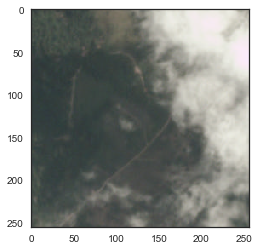

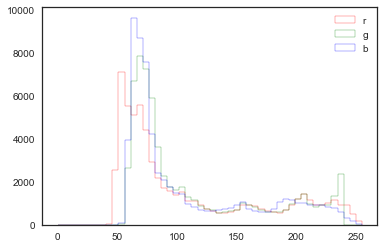

In [56]:
img = load_image(sample_to_fname(sample_images(['partly_cloudy'], 1), 0))
plt.figure()
plt.imshow(img)
plt.figure()
color_histogram(img)

Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_20614.jpg
Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_30748.jpg
Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_5609.jpg
Found image /Users/jiayou/Documents/Kaggle Data/Amazon/train-jpg/train_17656.jpg


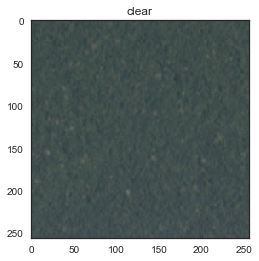

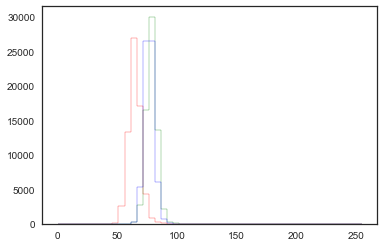

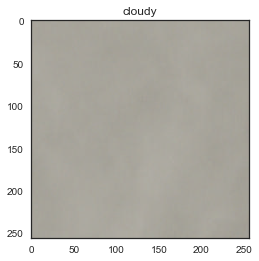

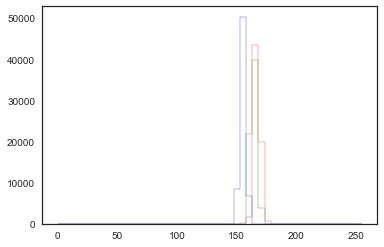

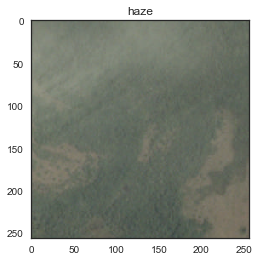

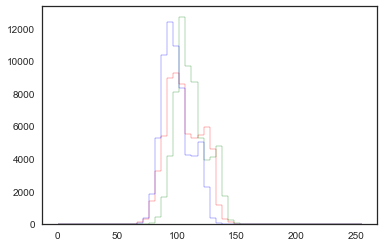

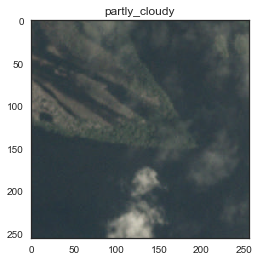

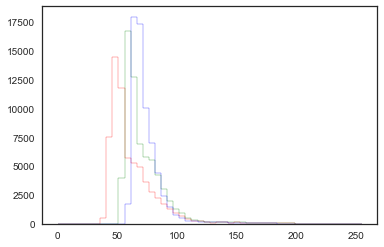

In [54]:
for tag in ['clear', 'cloudy', 'haze', 'partly_cloudy']:
    n_samples = 1
    samples = sample_images([tag], n_samples)
    for i in range(n_samples):
        img = load_image(sample_to_fname(samples, i))
        plt.figure()
        plt.title(tag)
        plt.imshow(img)
        plt.figure()
        color_histogram(img)
#         plt.bar(height = color_histogram(img), left = range(30))
        